## 梯度下降

In [ ]:
I1 = (x>=0) & (x<=2)
I2 = (x<=0) & (x>=-2)

In [113]:
def f_all(X, A):
    I1 = (X>=0) & (X<=2)
    I2 = (X<=0) & (X>=-2)
    return A[:, 0:1] + A[:,1:2]*X + A[:, 2:3]*X**2*I1 + A[:,3:4]*X**2*I2

In [102]:
x = np.random.rand(4,5)
B = np.repeat([1,2,3,4,], 4).reshape((4,4))
x = (x - np.mean(x)) / x.std()
y =  f_all(x, B)

In [103]:
m = x.shape[1]
alpha = 0.01
n = 100000

A = np.random.randn(4,4)

costs = []
for i in range(n):
    hypothesis = f_all(x, A)
    loss = hypothesis - y
    cost = np.sum(loss ** 2) / (2 *x.shape[1])
    costs.append(cost)
    
    a1_grad = np.sum(loss, axis=1) / m
    a2_grad = np.sum(x*loss, axis=1) / m
    a3_grad = np.sum(x**2*loss*I1, axis=1) / m   
    a4_grad = np.sum(x**2*loss*I2, axis=1) / m   
    
    A[:, 0] -=  alpha * a1_grad
    A[:, 1] -=  alpha * a2_grad
    A[:, 2] -=  alpha * a3_grad
    A[:, 3] -=  alpha * a4_grad

In [126]:
i = 2

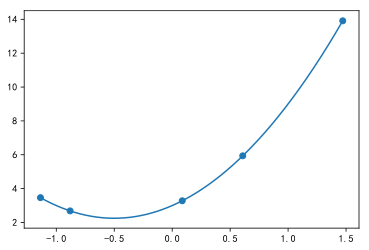

In [127]:
plt.scatter(x[i], y[i])
xx = np.linspace(x[i].min(), x[i].max(), 10000)
plt.plot(xx, f_all(xx, A)[i])

## 两条不连续的曲线

In [19]:
x = np.random.rand(1,5)
B = np.repeat([1,2,3,4,5,6], x.shape[0]).reshape((x.shape[0],6))
x = (x - np.mean(x)) / x.std()
y =  f_2(x, B)

In [20]:
def f_2(X, A):
    I1 = (X>=0) & (X<=2)
    I2 = (X<=0) & (X>=-2)
    return (A[:, 0:1] + A[:,1:2]*X + A[:, 2:3]*X**2)*I1 + (A[:, 3:4] + A[:,4:5]*X + A[:, 5:6]*X**2)*I2

In [21]:
I1 = (x>=0) & (x<=2)
I2 = (x<=0) & (x>=-2)

In [22]:
m = x.shape[1]
alpha = 0.01
n = 100000

A = np.random.randn(4,6)

costs = []
for i in range(n):
    hypothesis = f_2(x, A)
    loss = hypothesis - y
    cost = np.sum(loss ** 2) / (2 *x.shape[1])
    costs.append(cost)
    
    a1_grad = np.sum(loss*I1, axis=1) / m
    a2_grad = np.sum(x*loss*I1, axis=1) / m
    a3_grad = np.sum(x**2*loss*I1, axis=1) / m   
    
    a4_grad = np.sum(loss*I2, axis=1) / m
    a5_grad = np.sum(x*loss*I2, axis=1) / m
    a6_grad = np.sum(x**2*loss*I2, axis=1) / m   
    
    
    A[:, 0] -=  alpha * a1_grad
    A[:, 1] -=  alpha * a2_grad
    A[:, 2] -=  alpha * a3_grad
    A[:, 3] -=  alpha * a4_grad
    A[:, 4] -=  alpha * a5_grad
    A[:, 5] -=  alpha * a6_grad

In [23]:
i = 0

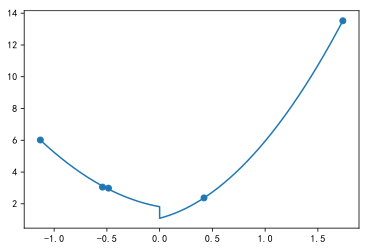

In [24]:
plt.scatter(x[i], y[i])
xx = np.linspace(x[i].min(), x[i].max(), 10000)
plt.plot(xx, f_all(xx, A)[i])

# 规划求解

## 无约束

### Nelder-Mead Simplex algorithm (method='Nelder-Mead')

In [1]:
import numpy as np
from scipy.optimize import minimize

In [2]:
def rosen(x):
    """The Rosenbrock function"""
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

In [8]:
x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])

In [9]:
res = minimize(rosen, x0, method='nelder-mead', options={'xtol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 339
         Function evaluations: 571


In [11]:
res.x

array([ 1.,  1.,  1.,  1.,  1.])

### Broyden-Fletcher-Goldfarb-Shanno algorithm (method='BFGS')

To demonstrate this algorithm, the Rosenbrock function is again used. The gradient of the Rosenbrock function is the vector:

\[ \begin{eqnarray*} \frac{\partial f}{\partial x_{j}} & = & \sum_{i=1}^{N}200\left(x_{i}-x_{i-1}^{2}\right)\left(\delta_{i,j}-2x_{i-1}\delta_{i-1,j}\right)-2\left(1-x_{i-1}\right)\delta_{i-1,j}.\\ & = & 200\left(x_{j}-x_{j-1}^{2}\right)-400x_{j}\left(x_{j+1}-x_{j}^{2}\right)-2\left(1-x_{j}\right).\end{eqnarray*}\]
This expression is valid for the interior derivatives. Special cases are

\[ \begin{eqnarray*} \frac{\partial f}{\partial x_{0}} & = & -400x_{0}\left(x_{1}-x_{0}^{2}\right)-2\left(1-x_{0}\right),\\ \frac{\partial f}{\partial x_{N-1}} & = & 200\left(x_{N-1}-x_{N-2}^{2}\right).\end{eqnarray*}\]
A Python function which computes this gradient is constructed by the code-segment:

In [14]:
def rosen_der(x):
    xm = x[1:-1]
    xm_m1 = x[:-2]
    xm_p1 = x[2:]
    der = np.zeros_like(x)
    der[1:-1] = 200*(xm-xm_m1**2) - 400*(xm_p1 - xm**2)*xm - 2*(1-xm)
    der[0] = -400*x[0]*(x[1]-x[0]**2) - 2*(1-x[0])
    der[-1] = 200*(x[-1]-x[-2]**2)
    return der

In [15]:
res = minimize(rosen, x0, method='BFGS', jac=rosen_der,
               options={'disp': True})
res.x

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 25
         Function evaluations: 30
         Gradient evaluations: 30


array([ 1.00000004,  1.0000001 ,  1.00000021,  1.00000044,  1.00000092])

## 有约束规划

The minimize function also provides an interface to several constrained minimization algorithm. As an example, the Sequential Least SQuares Programming optimization algorithm (SLSQP) will be considered here. This algorithm allows to deal with constrained minimization problems of the form:

\[ \begin{eqnarray*} \min F(x) \\ \text{subject to } & C_j(X) = 0 , &j = 1,...,\text{MEQ}\\ & C_j(x) \geq 0 , &j = \text{MEQ}+1,...,M\\ & XL \leq x \leq XU , &I = 1,...,N. \end{eqnarray*}\]
As an example, let us consider the problem of maximizing the function:

$$f(x, y) = 2 x y + 2 x - x^2 - 2 y^2$$

subject to an equality and an inequality constraints defined as:

\[\begin{eqnarray*} x^3 - y &= 0 \\ y - 1 &\geq 0 \end{eqnarray*}\]
The objective function and its derivative are defined as follows.

In [18]:
def func(x, sign=1.0):
    """ Objective function """
    return sign*(2*x[0]*x[1] + 2*x[0] - x[0]**2 - 2*x[1]**2)

In [19]:
def func_deriv(x, sign=1.0):
    """ Derivative of objective function """
    dfdx0 = sign*(-2*x[0] + 2*x[1] + 2)
    dfdx1 = sign*(2*x[0] - 4*x[1])
    return np.array([ dfdx0, dfdx1 ])

In [16]:
cons = ({'type': 'eq',
         'fun' : lambda x: np.array([x[0]**3 - x[1]]),
         'jac' : lambda x: np.array([3.0*(x[0]**2.0), -1.0])},
        {'type': 'ineq',
         'fun' : lambda x: np.array([x[1] - 1]),
         'jac' : lambda x: np.array([0.0, 1.0])})

In [20]:
res = minimize(func, [-1.0,1.0], args=(-1.0,), jac=func_deriv,
               method='SLSQP', options={'disp': True})

print(res.x)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -2.0
            Iterations: 4
            Function evaluations: 5
            Gradient evaluations: 4
[ 2.  1.]


In [91]:
res = minimize(func, [-1.0,1.0], args=(-1.0,), jac=func_deriv,
               constraints=cons, method='SLSQP', options={'disp': True})
print(res.x)


Optimization terminated successfully.    (Exit mode 0)
            Current function value: -1.0000001831052137
            Iterations: 9
            Function evaluations: 14
            Gradient evaluations: 9
[ 1.00000009  1.        ]


### 尝试

In [2]:
def fun_con(x, sign=1.0):
    return x[0]**2 *sign

In [3]:
def fun_con_deri(x, sign=1.0):
    return np.array([ 2*x *sign])  

In [4]:
con = ({'type':'ineq',
      'fun': lambda x: x-100,
      'jac': lambda x: 1})

In [5]:
res = minimize(fun_con, [10], args=(10), jac=fun_con_deri, constraints=con,
               method='SLSQP', options={'disp': True})
print(res.x)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 99999.99999932724
            Iterations: 3
            Function evaluations: 16
            Gradient evaluations: 3
[100.]


## 最小二乘法拟合Least-squares minimization (least_squares)

\[\begin{split}\begin{align} &\min_\mathbf{x} \frac{1}{2} \sum_{i = 1}^m \rho\left(f_i(\mathbf{x})^2\right) \\ &\text{subject to }\mathbf{lb} \leq \mathbf{x} \leq \mathbf{ub} \end{align}\end{split}\]
Here \(f_i(\mathbf{x})\) are smooth functions from \(\mathbb{R}^n\) to \(\mathbb{R}\), we refer to them as residuals. The purpose of a scalar valued function \(\rho(\cdot)\) is to reduce the influence of outlier residuals and contribute to robustness of the solution, we refer to it as a loss function. A linear loss function gives a standard least-squares problem. Additionally, constraints in a form of lower and upper bounds on some of \(x_j\) are allowed.

All methods specific to least-squares minimization utilize a \(m \times n\) matrix of partial derivatives called Jacobian and defined as \(J_{ij} = \partial f_i / \partial x_j\). It is highly recommended to compute this matrix analytically and pass it to least_squares, otherwise it will be estimated by finite differences which takes a lot of additional time and can be very inaccurate in hard cases.

Function least_squares can be used for fitting a function \(\varphi(t; \mathbf{x})\) to empirical data \(\{(t_i, y_i), i = 0, \ldots, m-1\}\). To do this one should simply precompute residuals as \(f_i(\mathbf{x}) = w_i (\varphi(t_i; \mathbf{x}) - y_i)\), where \(w_i\) are weights assigned to each observation.

Here we consider “Analysis of an Enzyme Reaction” problem formulated in [1]. There are 11 residuals defined as

$$f_i(x) = \frac{x_0 (u_i^2 + u_i x_1)}{u_i^2 + u_i x_2 + x3} - y_i, \quad i = 0, \ldots, 10,$$

where \(y_i\) are measurement values and \(u_i\) are values of the independent variable. The unknown vector of parameters is \(\mathbf{x} = (x_0, x_1, x_2, x_3)^T\). As was said previously, it is recommended to compute Jacobian matrix in a closed form:

\[\begin{split}\begin{align} &J_{i0} = \frac{\partial f_i}{\partial x_0} = \frac{u_i^2 + u_i x_1}{u_i^2 + u_i x_2 + x_3} \\ &J_{i1} = \frac{\partial f_i}{\partial x_1} = \frac{u_i x_0}{u_i^2 + u_i x_2 + x_3} \\ &J_{i2} = \frac{\partial f_i}{\partial x_2} = -\frac{x_0 (u_i^2 + u_i x_1) u_i}{(u_i^2 + u_i x_2 + x_3)^2} \\ &J_{i3} = \frac{\partial f_i}{\partial x_3} = -\frac{x_0 (u_i^2 + u_i x_1)}{(u_i^2 + u_i x_2 + x_3)^2} \end{align}\end{split}\]
We are going to use the “hard” starting point defined in [1]. To find a physically meaningful solution, avoid potential division by zero and assure convergence to the global minimum we impose constraints $0 \leq x_j \leq 100, j = 0, 1, 2, 3$.

In [6]:
from scipy.optimize import least_squares

In [7]:
def model(x, u):
    return x[0] * (u ** 2 + x[1] * u) / (u ** 2 + x[2] * u + x[3])

In [8]:
def fun(x, u, y):
    return model(x, u) - y

In [9]:
def jac(x, u, y):
    J = np.empty((u.size, x.size))
    den = u ** 2 + x[2] * u + x[3]
    num = u ** 2 + x[1] * u
    J[:, 0] = num / den
    J[:, 1] = x[0] * u / den
    J[:, 2] = -x[0] * num * u / den ** 2
    J[:, 3] = -x[0] * num / den ** 2
    return J

In [12]:
u = np.array([4.0, 2.0, 1.0, 5.0e-1, 2.5e-1, 1.67e-1, 1.25e-1, 1.0e-1,
              8.33e-2, 7.14e-2, 6.25e-2])
y = np.array([1.957e-1, 1.947e-1, 1.735e-1, 1.6e-1, 8.44e-2, 6.27e-2,
              4.56e-2, 3.42e-2, 3.23e-2, 2.35e-2, 2.46e-2])
#x0 = np.array([2.5, 3.9, 4.15, 3.9])
x0 = np.array([1, 1, 1, 1])
res = least_squares(fun, x0, bounds=(0, 100), args=(u, y), verbose=1) #jac=jac, 


res.x


`ftol` termination condition is satisfied.
Function evaluations 72, initial cost 6.8846e-01, final cost 1.5375e-04, first-order optimality 8.45e-06.


array([ 0.19280787,  0.19126141,  0.12305257,  0.13605264])

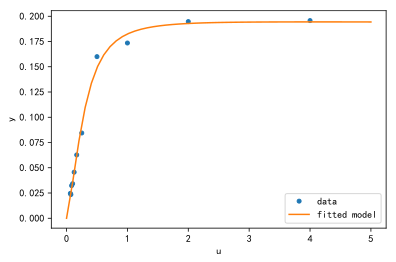

In [13]:
import matplotlib.pyplot as plt
u_test = np.linspace(0, 5)
y_test = model(res.x, u_test)
plt.plot(u, y, 'o', markersize=4, label='data')
plt.plot(u_test, y_test, label='fitted model')
plt.xlabel("u")
plt.ylabel("y")
plt.legend(loc='lower right')
plt.show()

### 尝试

In [202]:
def f_2(A, x):
    return A[0] + A[1]*x + A[2]*x**2*(x>0.5 )+ A[3]*x**2*(x<=0.5)

In [203]:
def func_2(A, x, y):
    return f_2(A, x) - y

In [130]:
def jac_2(A, x, y):
    J = np.empty((x.size, A.size))
    J[:, 0] = 1
    J[:, 1] = x
    J[:, 2] = x**2 * [x>0.5]
    J[:, 3] = x**2 * [x<=0.5]
    return J

In [134]:
x = np.linspace(0,1, 100)
B = np.array([1,2,3,-3])
y = f_2(B, x) + np.random.randn(x.size)/x.size *10

In [ ]:
x0 = np.random.rand(4)
least_squares(func_2, x0, jac=jac_2, args=(x, y), bounds=([-np.inf,-np.inf,0, 0], np.inf))

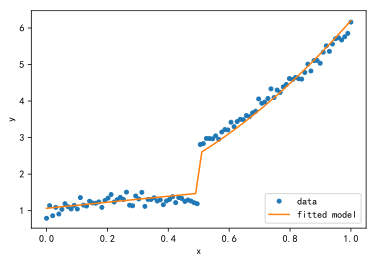

In [148]:
plt.plot(x, y, 'o', markersize=4, label='data')
xx = np.linspace(x.min(), x.max())
plt.plot(xx, f_2(res.x,xx), label='fitted model')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc='lower right')

In [154]:
def f2(A,x):
    return A[0] + A[1]*x + A[2]*x**2

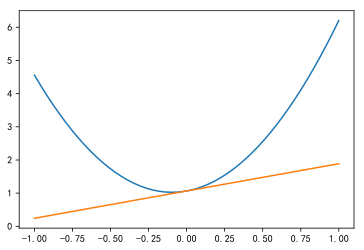

In [165]:
xx = np.linspace(-1,1)
plt.plot(xx, f2((res.x)[[0,1,2]], xx))
plt.plot(xx, f2((res.x)[[0,1,3]], xx))